In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df= pd.read_excel(r"C:\Users\poona\OneDrive\Desktop\Internship\Superstore_USA.xlsx")

In [4]:
df.head(2)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522


In [5]:
df.shape

(9426, 24)

In [8]:
df.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

In [7]:
df['Product Base Margin'].fillna(df['Product Base Margin'].mean(),inplace=True)

C:\Users\poona\AppData\Local\Temp\ipykernel_8816\3821109820.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product Base Margin'].fillna(df['Product Base Margin'].mean(),inplace=True)


In [12]:
df['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: count, dtype: int64

In [10]:
df["Order Priority"].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [11]:
df['Order Priority']= df['Order Priority'].replace('Critical ','Critical')

In [13]:
# Convert 'Order Date' and 'Ship Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Set 'Order Date' as the index of the dataframe
df.set_index('Order Date', inplace=True)

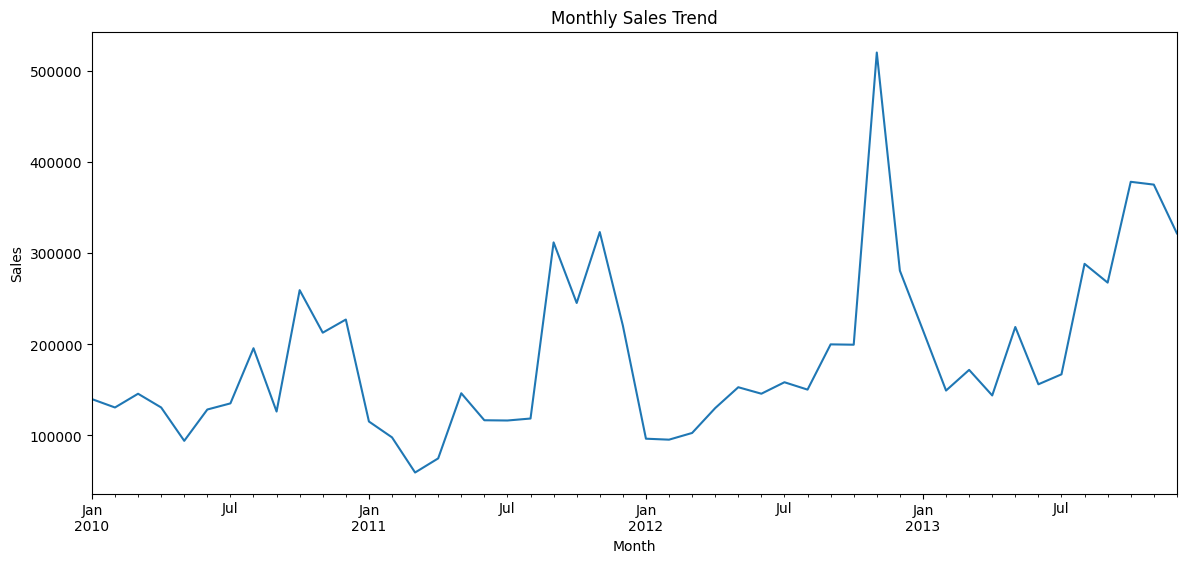

In [14]:
# Plotting sales trends over time
plt.figure(figsize=(14, 6))
df['Sales'].resample('ME').sum().plot()
df['Month'] = df.index.month
plt.title('Monthly Sales Trend')
plt.savefig('Monthly Sales Trend.jpg')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [ ]:
# Plotting seasonal effects using a box plot

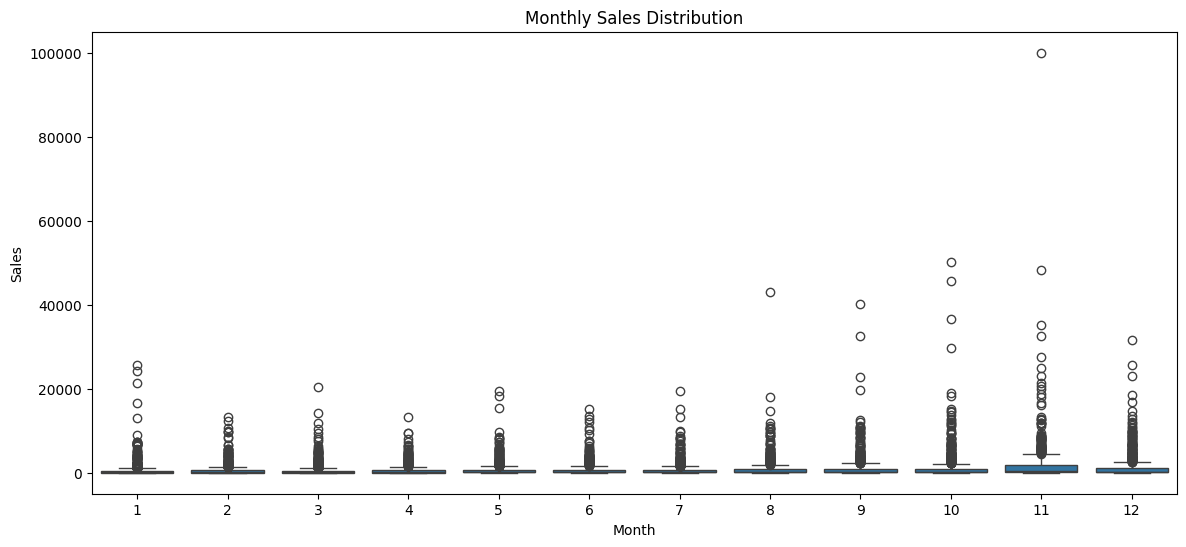

In [15]:
# Extract month and year from the index
df['Month'] = df.index.month
df['Year'] = df.index.year

# Plotting seasonal effects using a box plot
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Month', y='Sales')
plt.title('Monthly Sales Distribution')
plt.savefig('Monthly Sales Distribution.jpg')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

# Group by product name and calculate total sales

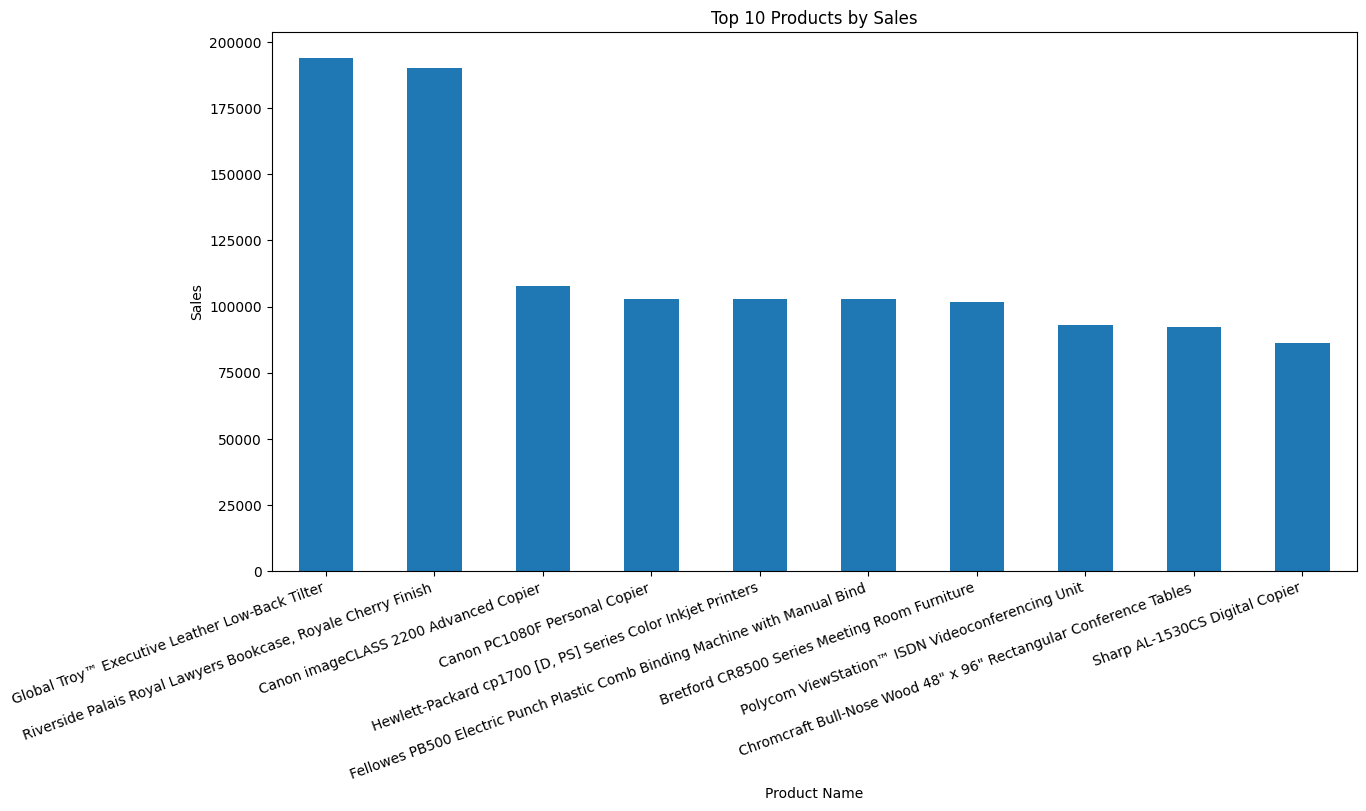

In [16]:
# Group by product name and calculate total sales
product_sales = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)

# Plotting top 10 products by sales
plt.figure(figsize=(14, 7))
product_sales.head(10).plot(kind='bar')
plt.title('Top 10 Products by Sales')
plt.savefig('Top 10 Products by Sales.jpg')
plt.xlabel('Product Name')
plt.ylabel('Sales')
plt.xticks(rotation=20, ha='right')
plt.show()

# Sales by product category

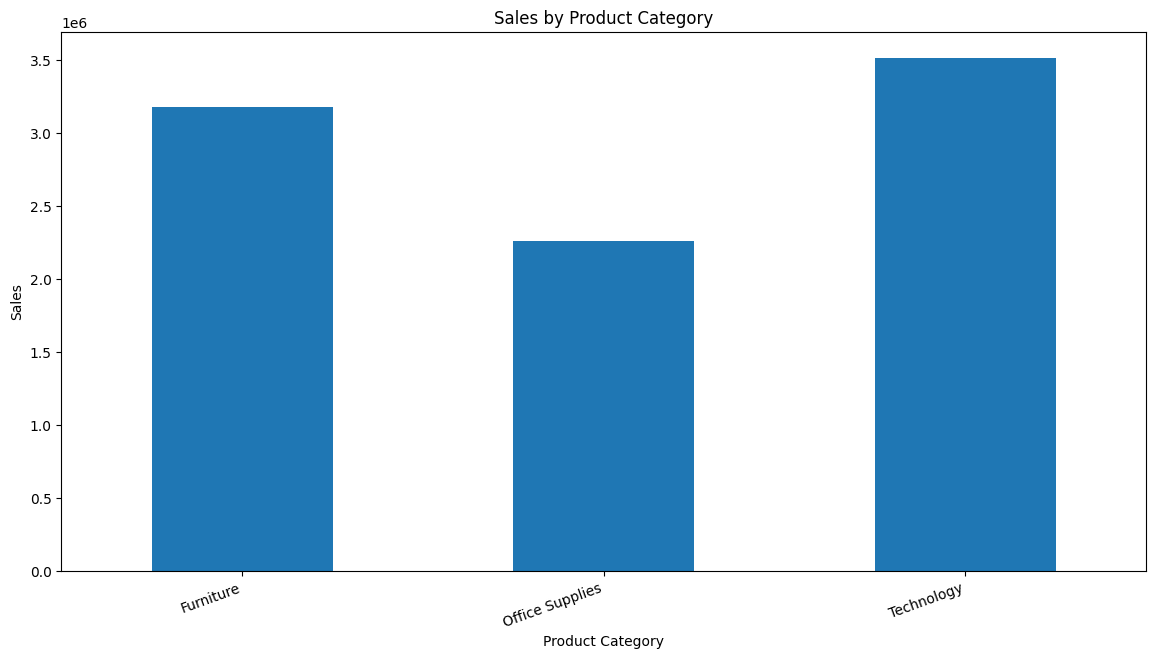

In [18]:
# Sales by product category
plt.figure(figsize=(14, 7))
category_sales = df.groupby('Product Category')['Sales'].sum()
category_sales.plot(kind='bar')
plt.title('Sales by Product Category')
plt.savefig('Sales by Product Category.jpg')
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.xticks(rotation=20, ha='right')
plt.show()


# Sales by product sub-category

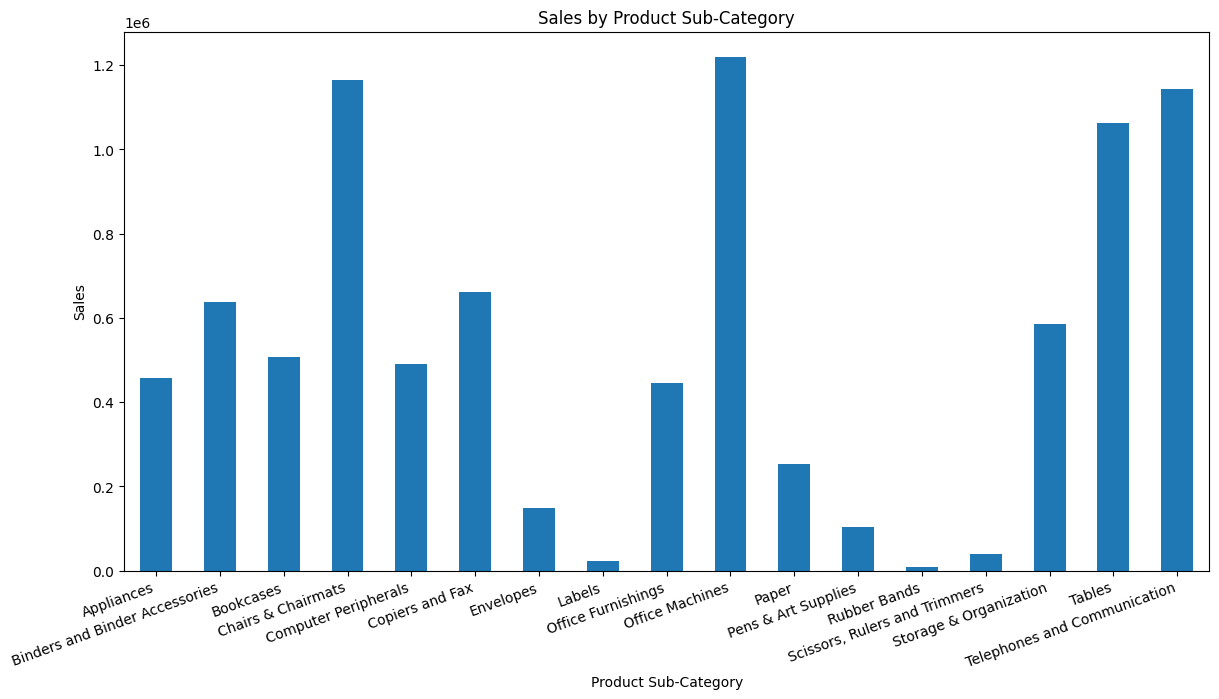

In [19]:
# Sales by product sub-category
plt.figure(figsize=(14, 7))
sub_category_sales = df.groupby('Product Sub-Category')['Sales'].sum()
sub_category_sales.plot(kind='bar')
plt.title('Sales by Product Sub-Category')
plt.savefig('Sales by Product Sub-Category.jpg')
plt.xlabel('Product Sub-Category')
plt.ylabel('Sales')
plt.xticks(rotation=20, ha='right')
plt.show()